# Movie Recommendation System

## 01. Overview:
This report outlines the development of a Movie Recommendation System utilizing user-based collaborative filtering and item-based similarity calculations using Pearson correlation. The system aims to predict movie recommendations based on user input, leveraging a dataset comprising user ratings and movie metadata.

## 02. Objectives:
The main objectives of this project are:
  1. To implement a collaborative filtering technique that recommends movies based on user preferences.
  2. To calculate item-based similarity using Pearson correlation.
  3. To provide a user-friendly interface that allows users to obtain movie recommendations based on the movies they have watched.

## 03. Data Collection:
The project utilizes two primary datasets:
* Ratings Dataset: Contains user ratings for movies, including user IDs, movie IDs, and ratings.
* Movies Metadata Dataset: Contains metadata for movies, including movie IDs, titles, and genres.

Link : https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/

In [5]:
#Import the Required Packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
# Load datasets
user_ratings = pd.read_csv("ratings.csv")
movie_metadata= pd.read_csv("movies_data.csv")

C:\Users\DELL\AppData\Local\Temp\ipykernel_6036\903803929.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movie_metadata= pd.read_csv("movies_data.csv")


## 04. Data Cleaning and Transformation:
The following steps were taken to clean and prepare the datasets for analysis:

1. **Loading the Datasets:** The datasets were loaded into a data processing tool.
2. **Selecting Relevant Columns:** From the movies metadata, only essential columns (movie ID, title, and genres) were retained. The timestamp column from the ratings dataset was dropped for simplicity.
3. **Handling Missing Values:** The datasets were checked for any missing values to ensure data integrity and completeness.
4. **Column Renaming and Type Consistency:** The `id` column in the movies dataset was renamed to `movieId` to align with the ratings dataset, and both datasets had their `movieId` columns converted to a consistent data type.
5. **Duplicate Checks:** The movies dataset was scanned for duplicate entries to maintain a clean and accurate dataset.
6. **Merging Datasets:** The cleaned ratings and movies datasets were merged on the movieId column, creating a comprehensive dataset for further analysis.


In [8]:
#Keeping only MovieID, Movie Title and Genres
movies_df = movie_metadata[['id','title', 'genres']]
movies_df.head()

,id,title,genres
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]"


In [9]:
# Dropping the timestamp colunm from the datasets
ratings_df = user_ratings.drop('timestamp', axis=1)
ratings_df.head()

,userId,movieId,rating
0,1,16,4.0
1,1,24,1.5
2,1,32,4.0
3,1,47,4.0
4,1,50,4.0


In [10]:
# Check the shape of the dataset
ratings_df.shape
movies_df.shape

(42228, 3)

In [11]:
# Get summary infomation
ratings_df.info()
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   105339 non-null  int64  
 1   movieId  105339 non-null  int64  
 2   rating   105339 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42228 entries, 0 to 42227
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      42228 non-null  object
 1   title   42228 non-null  object
 2   genres  42228 non-null  object
dtypes: object(3)
memory usage: 989.8+ KB


In [12]:
# Check for missing values
print(ratings_df.isnull().sum())
print(movies_df.isnull().sum())

userId     0
movieId    0
rating     0
dtype: int64
id        0
title     0
genres    0
dtype: int64


In [13]:
print(movies_df.columns)
print(ratings_df.columns)

Index(['id', 'title', 'genres'], dtype='object')
Index(['userId', 'movieId', 'rating'], dtype='object')


In [14]:
#Rename movie_metadata dataset id column to movieId
movies_df = movies_df.rename(columns={'id': 'movieId'})
print(movies_df.columns)

Index(['movieId', 'title', 'genres'], dtype='object')


In [15]:
# Convert both dataset movieId columns to same string type
ratings_df['movieId'] = ratings_df['movieId'].astype(str)
movies_df['movieId'] = movies_df['movieId'].astype(str)

ratings_df.info()
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   105339 non-null  int64  
 1   movieId  105339 non-null  object 
 2   rating   105339 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42228 entries, 0 to 42227
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  42228 non-null  object
 1   title    42228 non-null  object
 2   genres   42228 non-null  object
dtypes: object(3)
memory usage: 989.8+ KB


In [16]:
# Check for duplicates in movies dataset
duplicates_movies = movies_df[movies_df.duplicated(keep=False)]
print("Duplicate entries in movies dataset:")
print(duplicates_movies)

Duplicate entries in movies dataset:
Empty DataFrame
Columns: [movieId, title, genres]
Index: []


In [17]:
# Check for duplicates in rating dataset
duplicates_ratings = ratings_df[ratings_df.duplicated(keep=False)]
print("Duplicate entries in ratings dataset:")
print(duplicates_ratings)

Duplicate entries in ratings dataset:
Empty DataFrame
Columns: [userId, movieId, rating]
Index: []


In [18]:
# Merge cleaned datasets
merged_df = pd.merge(ratings_df, movies_df, on='movieId')
merged_df.head()

,userId,movieId,rating,title,genres
0,1,16,4.0,The Contender,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name..."
1,1,24,1.5,Forbidden Games,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
2,1,110,4.0,Three Colors: Red,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na..."
3,1,150,3.0,Super Troopers,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n..."
4,1,161,4.0,Murder by Death,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n..."


In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46220 entries, 0 to 46219
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   userId   46220 non-null  int64  
 1   movieId  46220 non-null  object 
 2   rating   46220 non-null  float64
 3   title    46220 non-null  object 
 4   genres   46220 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.8+ MB


In [20]:
duplicates_merg = merged_df[merged_df.duplicated(keep=False)]
print("Duplicate entries in ratings dataset:")
print(duplicates_merg)

Duplicate entries in ratings dataset:
Empty DataFrame
Columns: [userId, movieId, rating, title, genres]
Index: []


In [21]:
# Remove duplicates from the merged_df DataFrame
merged_df_cleaned = merged_df.drop_duplicates()

# Check for any remaining duplicates
remaining_duplicates = merged_df_cleaned[merged_df_cleaned.duplicated(keep=False)]

# Print the results
print("\nRemaining duplicate entries after cleaning:")
if remaining_duplicates.empty:
    print("No remaining duplicates found.")
else:
    print(remaining_duplicates)



Remaining duplicate entries after cleaning:
No remaining duplicates found.


## 05. Calculate Item-Based Similarity Using Pearson Correlation:

### - User-Movie Ratings Matrix
A user-movie ratings matrix was created, representing users as rows and movies as columns, with ratings as the values. Missing ratings were filled with zeros to facilitate similarity calculations.

In [24]:
subset_users = merged_df_cleaned['userId']
subset_df = merged_df_cleaned[merged_df_cleaned['userId'].isin(subset_users)]

# Create a pivot table with users as rows and movies as columns
user_movie_ratings = subset_df.pivot(index='userId', columns='movieId', values='rating')
# Fill NaN values with 0 
user_movie_ratings.fillna(0, inplace=True)

In [25]:
user_movie_ratings.head()

movieId,100,101,101362,1018,101904,102,1023,1024,103,103210,...,988,990,991,99106,993,994,99495,996,99859,99861
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### - Similarity Calculation
An item similarity matrix was computed using Pearson correlation to quantify the similarity between movies based on user ratings. This matrix serves as the foundation for generating movie recommendations.

In [27]:
# Calculate the Pearson correlation matrix item-based
item_similarity = user_movie_ratings.corr(method='pearson')
print(item_similarity)

movieId       100       101    101362      1018    101904       102      1023  \
movieId                                                                         
100      1.000000  0.114503  0.217867 -0.010671 -0.005364  0.109693 -0.017893   
101      0.114503  1.000000  0.051013  0.143109 -0.006614 -0.016150 -0.022064   
101362   0.217867  0.051013  1.000000 -0.005037  0.737463  0.061744 -0.008447   
1018    -0.010671  0.143109 -0.005037  1.000000 -0.002983 -0.007283 -0.009950   
101904  -0.005364 -0.006614  0.737463 -0.002983  1.000000 -0.003661 -0.005001   
...           ...       ...       ...       ...       ...       ...       ...   
994      0.378917  0.166087  0.152680 -0.014897 -0.007488  0.001196 -0.024979   
99495    0.233506  0.140662  0.420322 -0.002983 -0.001499 -0.003661 -0.005001   
996      0.145651  0.131332  0.124811  0.125951  0.179270  0.193557  0.030732   
99859   -0.005364 -0.006614 -0.002532 -0.002983 -0.001499 -0.003661 -0.005001   
99861   -0.005364 -0.006614 

In [28]:
item_similarity.shape

(3097, 3097)

## 06. Recommendation Engine: 
The recommendation system is designed to provide personalized movie recommendations based on user input. The main functionalities include:
1. **Retrieving Movie ID:** The system checks if the user-input movie title exists in the dataset and retrieves the corresponding movie ID.
2.**Checking Similarity:** The system ensures that the retrieved movie ID exists in the item similarity matrix before proceeding.
3. **Calculating Similar Movies:** Using the item similarity matrix, the system identifies movies that are similar to the input movie, sorting them by their similarity scores.
4. **Visualizing Similarity Scores:** The correlation scores for the recommended movies are visualized through a bar plot, enhancing user understanding of the recommendations.
5. **Returning Recommendations:** The system generates and presents a list of recommended movie titles to the user.

In [30]:
# Function to get movie recommendations using the item similarity matrix
def recommend_movies(movie_title, movies, item_similarity, num_recommendations=8):
    # Get the movie_id for the user input movie_title
    movie_id_series = movies[movies['title'] == movie_title]['movieId']
    
    if movie_id_series.empty:
        print("Movie title not found.")  
        return []  

    movie_id = movie_id_series.values[0]  

    # Check if the movie_id exists in the item similarity index
    if movie_id not in item_similarity.index:
        print(f"Movie ID {movie_id} not found in item similarity matrix.")
        return []

    # Get similar movies based on the item similarity score
    similar_movies = item_similarity[movie_id].sort_values(ascending=False)
    
    # Get the top 'num_recommendations' movie_id
    top_movies = similar_movies.index[1:num_recommendations + 1] 
    
    # Get the movie_titles of the recommended movies by filtering movie_title by recommended movie_id
    recommended_titles = movies[movies['movieId'].isin(top_movies)]['title']
    
    # Plot the correlation scores
    plt.figure(figsize=(10, 6))
    plt.barh(recommended_titles, similar_movies[top_movies])
    plt.xlabel('Correlation Score')
    plt.title(f'Correlation Scores for Movies Similar to \"{movie_title}\"')
    plt.show()
    
    return recommended_titles.tolist()

## 07. User Interaction:
The system prompts users to input the title of a movie they have watched. If the movie exists in the dataset, the system generates a list of recommended movies. In cases where the movie title is not found, the user is advised to check the title and try again.

In [32]:
# Get the movie name user has watched
user_input = input("Enter a movie you have watched: ")  

Enter a movie you have watched:  Strangers with Candy


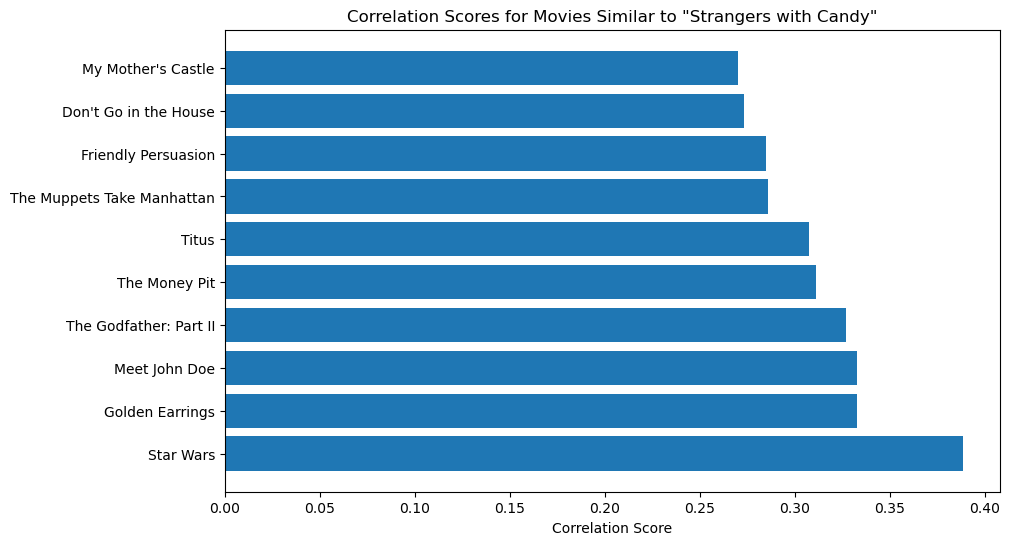


Recommended movies:
- Star Wars
- Golden Earrings
- Meet John Doe
- The Godfather: Part II
- The Money Pit
- Titus
- The Muppets Take Manhattan
- Friendly Persuasion
- Don't Go in the House
- My Mother's Castle


In [33]:
# Check if the movie exists 
if user_input in movies_df['title'].values:
    recommended = recommend_movies(user_input, movies_df, item_similarity, num_recommendations=10)
    if recommended:
        print("\nRecommended movies:")
        for movie in recommended:
            print(f"- {movie}") 
else:
    print("Sorry, the movie you entered is not in the dataset. Please check the title and try again.")

## Conclusion:
The Movie Recommendation System successfully implements user-based collaborative filtering and item-based similarity calculations using Pearson correlation. It provides personalized movie recommendations based on user input while also visualizing the correlation scores for clarity.